Importing libraries 

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing Dataset 

In [32]:
df = pd.read_csv('ipl2024 Matches.csv')
df

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed


Data cleaning 

In [33]:
df = df.drop(columns=['id','date','toss_winner','decision','most_runs','winner','most_wkts','player_of_the_match'])
df.head(1)

,team1,team2,first_score,first_wkts,second_score,second_wkts
0,Banglore,Chennai,173,6,176,4


In [34]:
df = df.rename(columns={'team1':'TeamA','team2':'TeamB','first_score':'TeamA_score','first_wkts':'TeamA_wickets','second_score':'TeamB_score','second_wkts':'TeamB_wickets'})
df.head(1)

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,Banglore,Chennai,173,6,176,4


In [35]:
df.drop_duplicates()

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,Banglore,Chennai,173,6,176,4
1,Delhi,Punjab,174,9,177,6
2,Kolkata,Hyderabad,208,7,204,7
3,Rajasthan,Lucknow,193,4,173,6
4,Gujarat,Mumbai,168,6,162,9
...,...,...,...,...,...,...
69,Rajasthan,Kolkata,0,0,0,0
70,Hyderabad,Kolkata,159,10,164,2
71,Banglore,Rajasthan,172,8,174,6
72,Hyderabad,Rajasthan,175,9,139,7


In [36]:
df.dropna()
df.count()

TeamA            74
TeamB            74
TeamA_score      74
TeamA_wickets    74
TeamB_score      74
TeamB_wickets    74
dtype: int64

In [37]:
df.isna()

,TeamA,TeamB,TeamA_score,TeamA_wickets,TeamB_score,TeamB_wickets
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
69,False,False,False,False,False,False
70,False,False,False,False,False,False
71,False,False,False,False,False,False
72,False,False,False,False,False,False


In [38]:
df.isna().sum()

TeamA            0
TeamB            0
TeamA_score      0
TeamA_wickets    0
TeamB_score      0
TeamB_wickets    0
dtype: int64

Checking Outliers

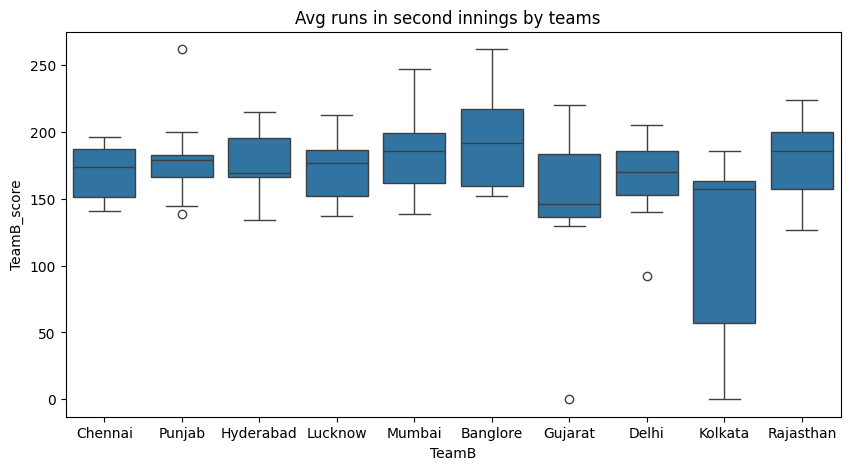

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='TeamB',y='TeamB_score',data=df)
plt.title('Avg runs in second innings by teams  ')
plt.show()

Removing outliers 

In [40]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TeamA_score      45.75
TeamA_wickets     3.75
TeamB_score      53.00
TeamB_wickets     4.75
dtype: float64


In [41]:
df = df[~((df.select_dtypes(include = np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
Q1 = df.select_dtypes(include = np.number).quantile(0.25)
Q3 = df.select_dtypes(include = np.number).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TeamA_score      43.0
TeamA_wickets     3.0
TeamB_score      47.0
TeamB_wickets     4.0
dtype: float64


Visualization 

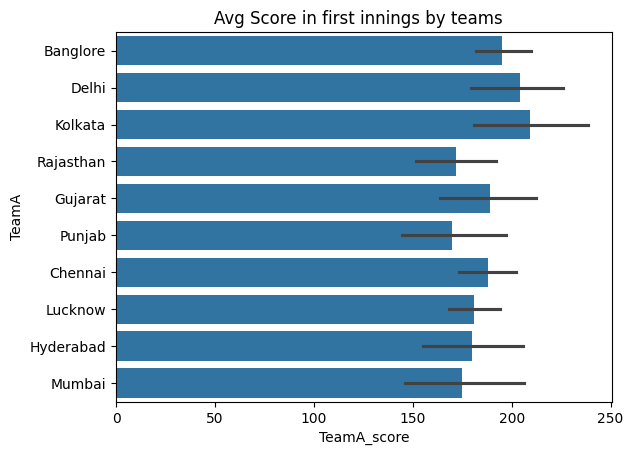

In [43]:
sns.barplot(x='TeamA_score',y ='TeamA',data=df)
plt.title('Avg Score in first innings by teams  ')
plt.show()

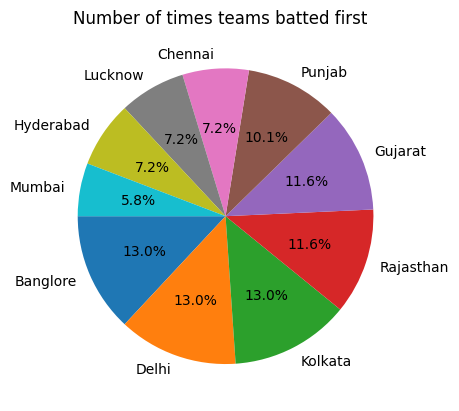

In [44]:
plt.title('Number of times teams batted first  ')
typ = df['TeamA'].unique()
sizes = df['TeamA'].value_counts()
plt.pie(sizes, labels=typ,autopct='%1.1f%%',startangle=180)
plt.show()

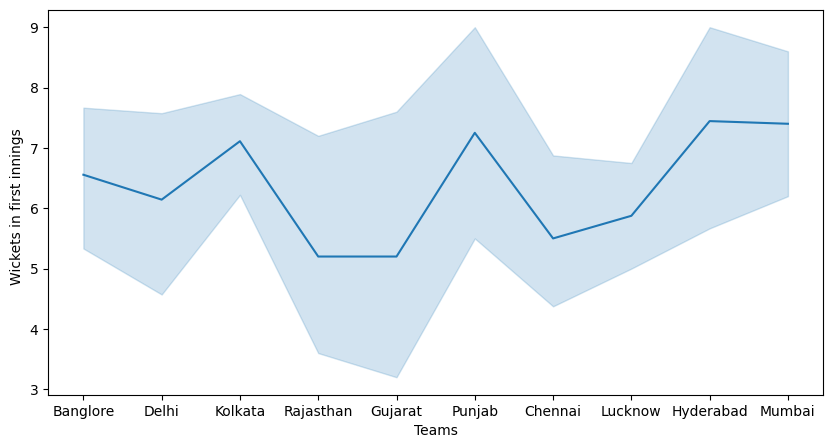

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamA',y='TeamA_wickets',data = df)
plt.xlabel("Teams")
plt.ylabel("Wickets in first innings  ")
plt.show()

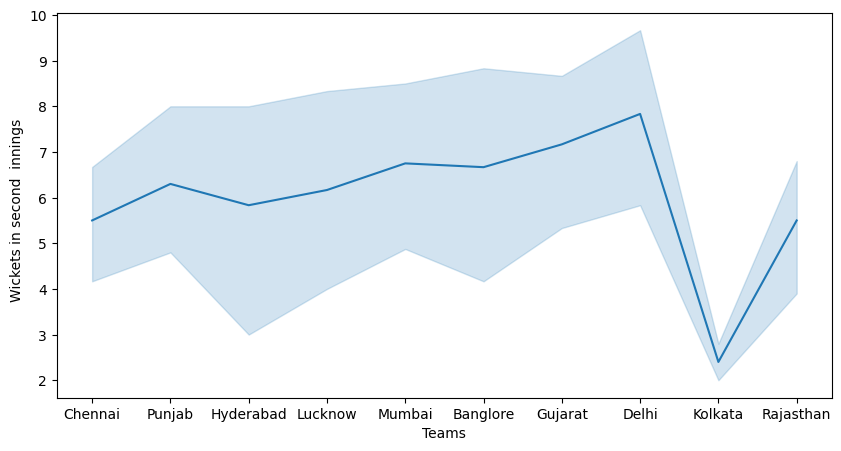

In [46]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='TeamB',y='TeamB_wickets',data = df)
plt.xlabel("Teams")
plt.ylabel("Wickets in second  innings  ")
plt.show()

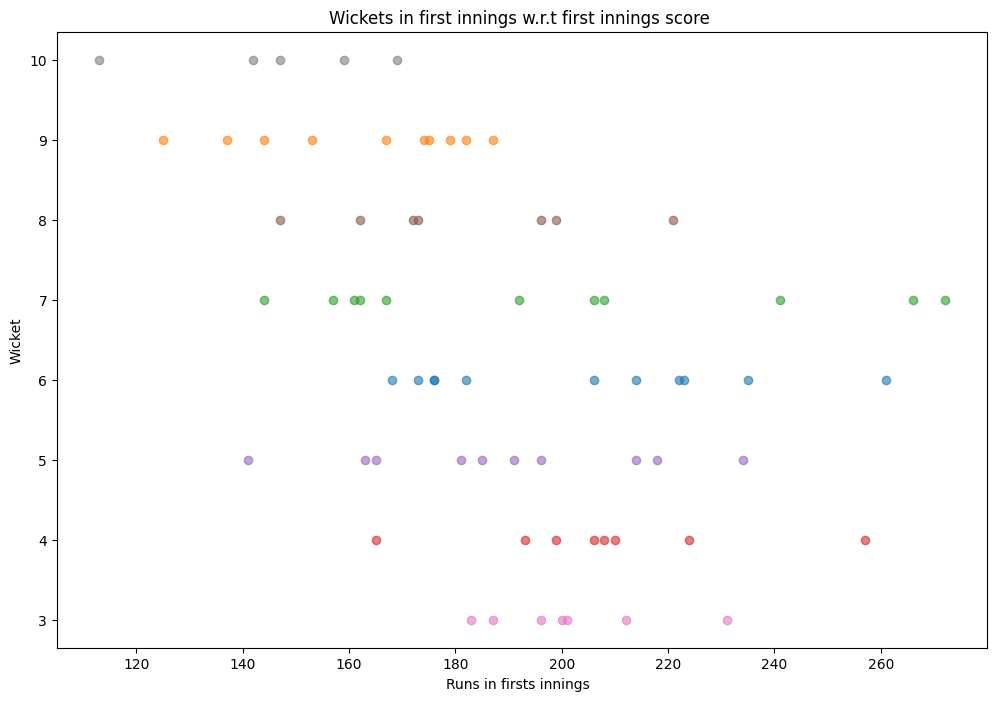

In [47]:
plt.figure(figsize=(12, 8))
for species in df['TeamA_wickets'].unique():
  subset = df[df['TeamA_wickets'] == species]
  plt.scatter( subset['TeamA_score'],subset['TeamA_wickets'], label=species, alpha=0.6)

plt.ylabel('Wicket')
plt.xlabel('Runs in firsts innings  ')
plt.title('Wickets in first innings w.r.t first innings score ')

plt.show()

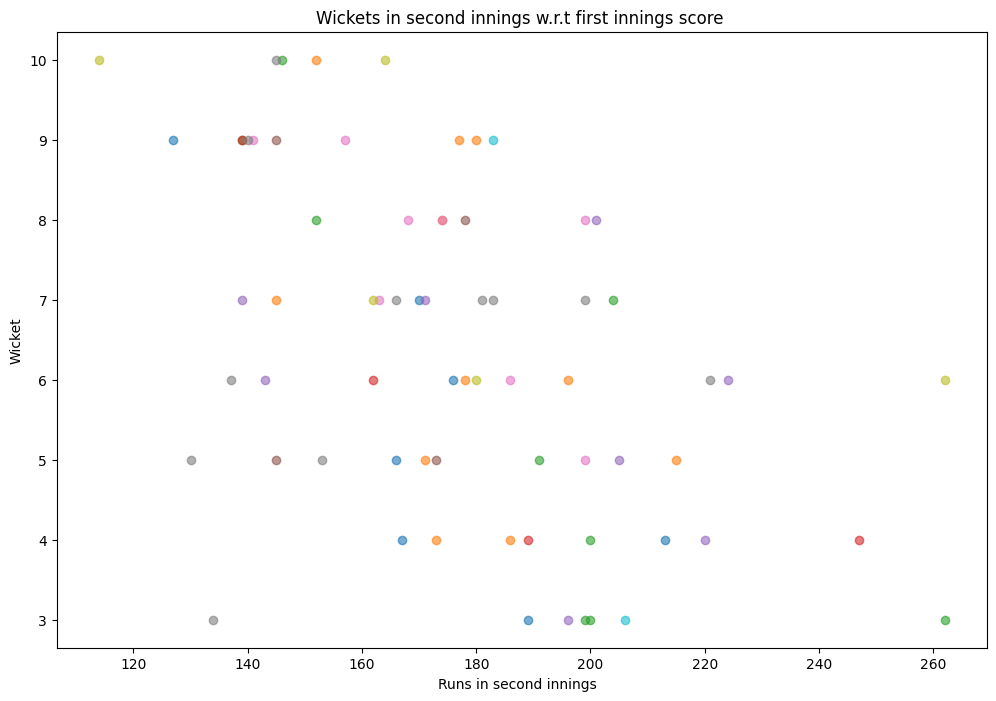

In [48]:
plt.figure(figsize=(12, 8))
for species in df['TeamB_wickets'].unique():
  subset = df[df['TeamB_wickets'] == species]
  plt.scatter( subset['TeamB_score'],subset['TeamA_wickets'], label=species, alpha=0.6)

plt.ylabel('Wicket')
plt.xlabel('Runs in second innings  ')
plt.title('Wickets in second innings w.r.t first innings score ')

plt.show()

Correlation Matrix 

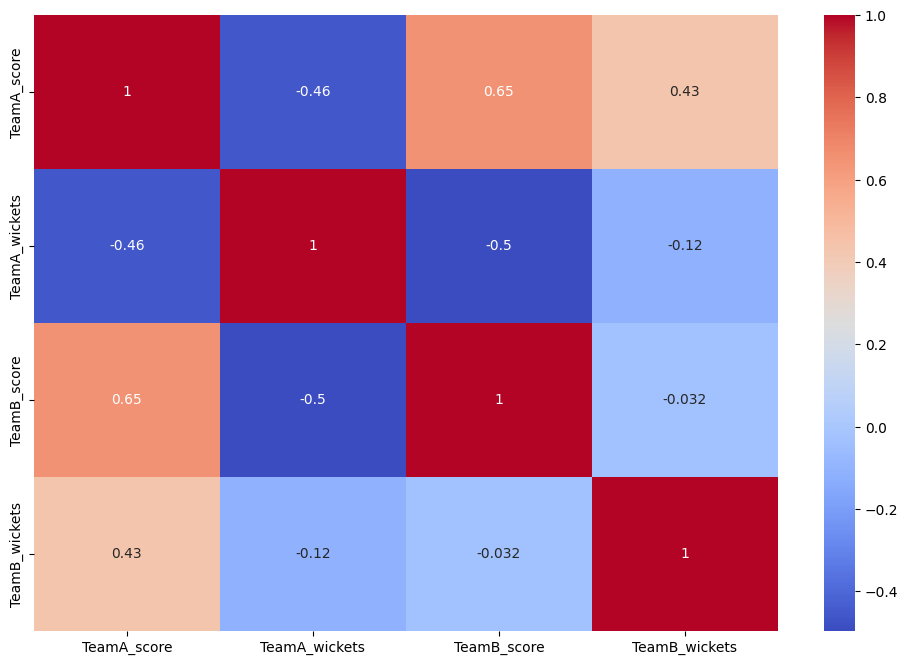

In [49]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Import the required libraries for PCA(Principal Component Analysis)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Preprocessing

In [51]:
X = df[['TeamA_wickets', 'TeamB_wickets', 'TeamA_score', 'TeamB_score']]
y = df['TeamA']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55, 4)
(14, 4)
(55,)
(14,)


In [53]:
# standardization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.58171663,  0.34018186,  0.19980192,  0.72400108],
       [-0.17099639, -0.73924136, -0.46884737,  0.        ],
       [-1.58171663,  0.34018186,  0.34516047,  0.75547939],
       [-0.17099639,  1.05979735, -0.61420591, -0.44069631],
       [ 0.76948376,  0.69998961,  0.92659464,  0.7869577 ],
       [-0.64123647,  0.69998961,  1.30452685,  0.91287093],
       [ 0.76948376, -1.0990491 , -0.78863617, -0.25182646],
       [-0.17099639,  1.41960509,  0.95566635,  1.41652386],
       [ 1.23972384, -1.0990491 , -1.05028154, -0.59808785],
       [ 1.23972384, -0.73924136, -1.86428938, -1.54243709],
       [-0.17099639, -1.45885684, -0.38163225,  0.12591323],
       [ 0.76948376, -0.37943362,  0.28701705,  0.06295662],
       [ 1.23972384,  1.41960509, -0.06184345, -1.13321908],
       [-0.17099639, -0.01962588, -0.38163225,  0.06295662]])

Applying PCA(principal component analysis)

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
X_pca

array([[ 1.46666114, -0.90142761],
       [-0.44613055, -0.77208407],
       [ 1.56154157, -0.88702046],
       [ 0.07364871,  0.65123867],
       [ 0.91027507,  0.87620404],
       [ 1.86775424,  0.05356411],
       [-1.37111284, -0.45826694],
       [ 2.03399887,  0.68848201],
       [-1.91854542, -0.12771962],
       [-2.67570508,  0.25333169],
       [-0.66386297, -1.32414945],
       [-0.29834764,  0.16111473],
       [-0.50242491,  2.02781573],
       [-0.03775017, -0.24108285]])